## Importing Essential Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [ ]:
df = pd.read_csv('/content/Rainfall.csv')

In [ ]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
df.shape

(366, 12)

In [ ]:
print(df.dtypes)

day                         int64
pressure                  float64
maxtemp                   float64
temparature               float64
mintemp                   float64
dewpoint                  float64
humidity                    int64
cloud                       int64
rainfall                   object
sunshine                  float64
         winddirection    float64
windspeed                 float64
dtype: object


In [ ]:
print("Data Info : " )
df.info()

Data Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
# remove trailing space in winddirection column
df.columns = df.columns.str.strip()

In [ ]:
print(df.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
# Dropping 'day' column coz it is irrelevent
df = df.drop('day' , axis=1)

In [ ]:
# Imputing missing values in winddirection and windspeed
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mode()[0])

In [ ]:
print(df.isna().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [ ]:
df.sample()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
161,1005.7,31.1,27.9,26.6,25.8,89,80,yes,4.5,220.0,14.6


In [ ]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# converting rainfall columns's yes and no to 1 and 0
df['rainfall'] = df['rainfall'].map({'yes': 1 , 'no': 0})

In [ ]:
df['rainfall'].unique()

array([1, 0])

# EDA ( Exploratory Data Analysis )

In [ ]:
df.shape

(366, 11)

In [ ]:
sns.set(style='darkgrid')

In [ ]:
# Summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
rainfall,366.0,0.680328,0.466988,0.0,0.000,1.00,1.000,1.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,366.0,101.284153,81.722827,10.0,40.000,70.00,190.000,350.0


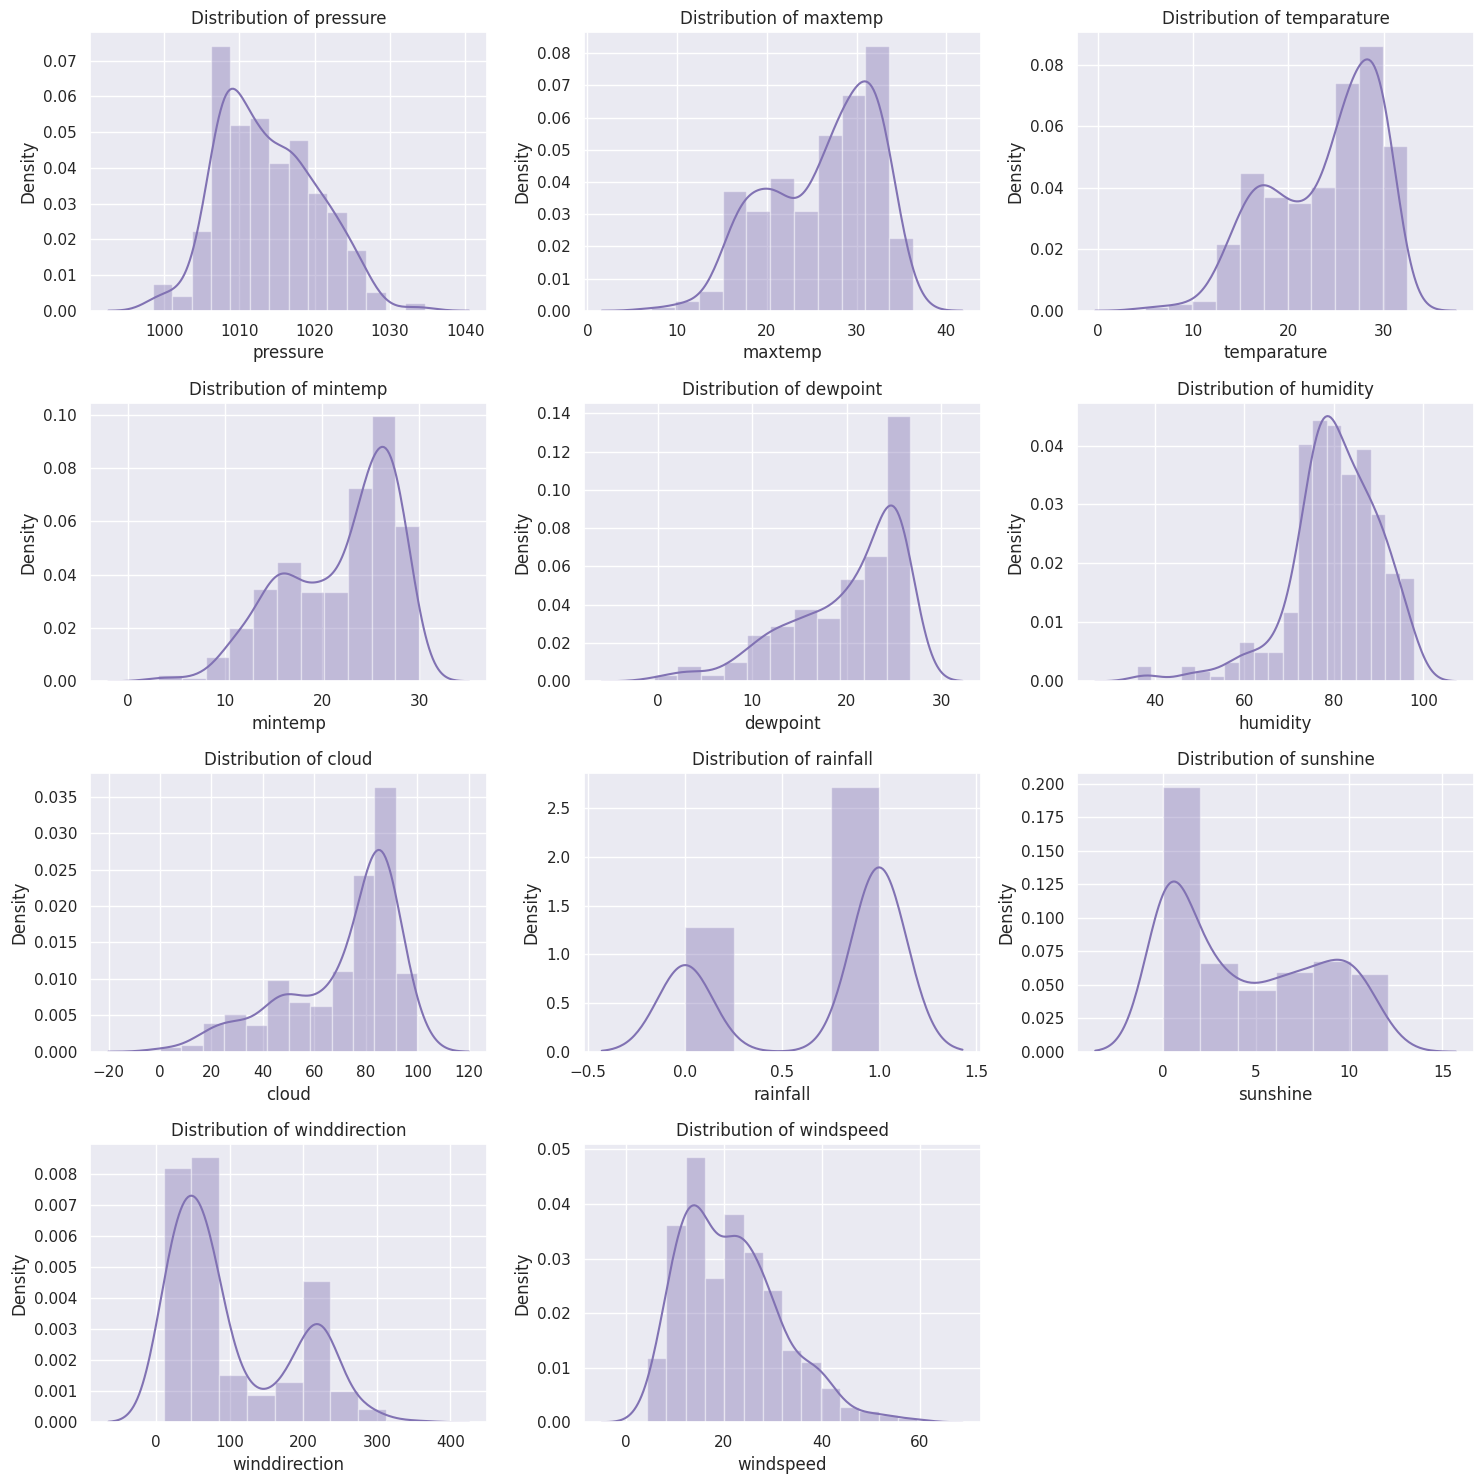

In [ ]:
plt.figure(figsize=(15,15))
for i , col in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  sns.distplot(df[col],kde=True , color='m')
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Here , the features are not normally distributed , and we dont need to standardize them cause Tree-based models, such as Decision Trees, Random Forests, and Gradient Boosted Trees (e.g., XGBoost, LightGBM, CatBoost), do not require standardization or normalization of data because of the way they split the data and make predictions . Tree-based models make no assumptions about the distribution of the data. They don't require features to be normally distributed, unlike algorithms like Logistic Regression or Linear Discriminant Analysis (LDA), which perform better with normalized or standardized data and  relatively robust to outliers.

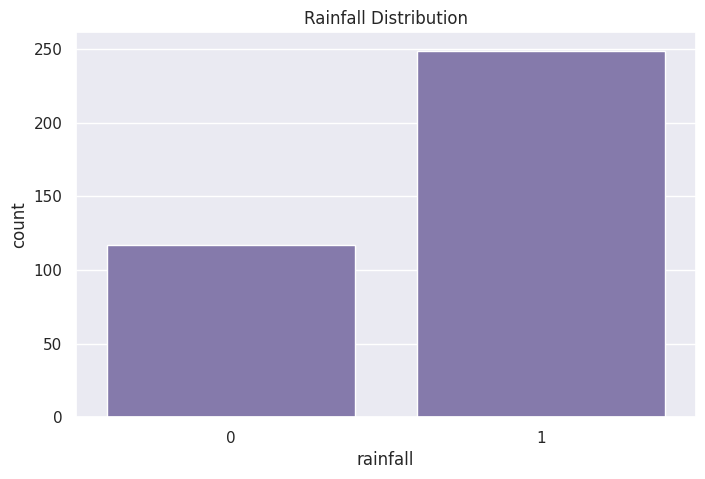

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['rainfall'], data=df, color='m')
plt.title('Rainfall Distribution')
plt.show()

see , the distribution of rainfall is highly imbalanced , which should be fixed

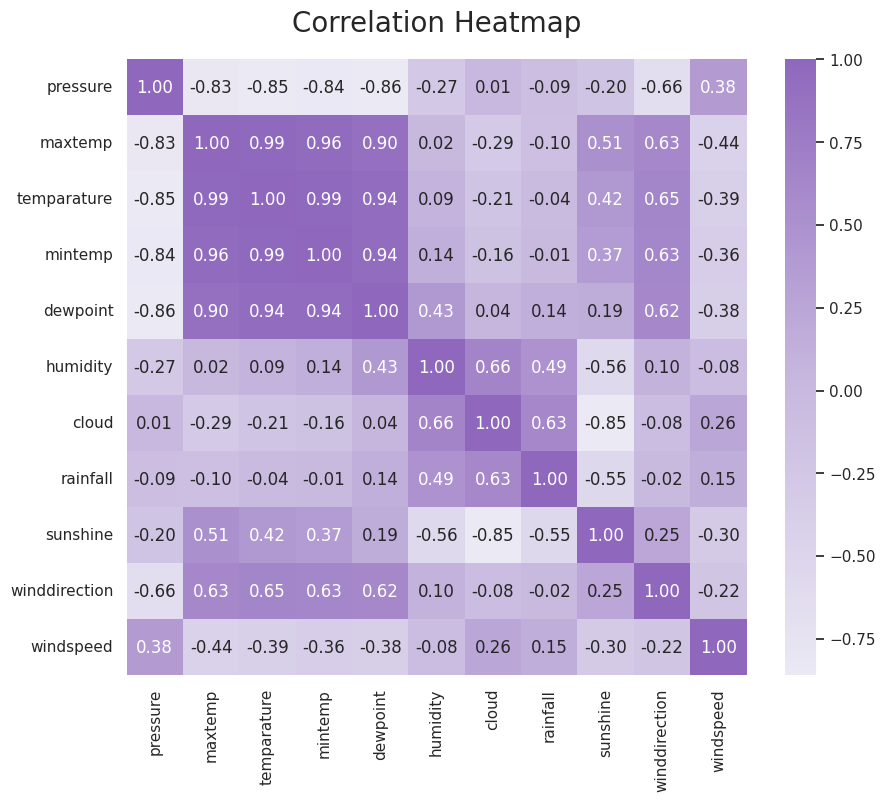

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Define a custom colormap
colors = ["#ebe9f4", "#c5b5dd", "#8f68bd"]
custom_cmap = LinearSegmentedColormap.from_list("custom", colors)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() , annot=True ,  cmap = custom_cmap , fmt = '.2f')
plt.title('Correlation Heatmap',fontsize=20, pad=20)
plt.show()

### **Inference**
Negative Correlation with Rainfall:

* Pressure (-0.09): There is a weak negative correlation between pressure and rainfall, indicating that lower pressures might slightly correspond to higher rainfall.
* Sunshine (-0.55): There is a moderate negative correlation between sunshine and rainfall, suggesting that less sunshine is associated with more rainfall.

Positive Correlation with Rainfall:

* Humidity (0.49): There is a moderate positive correlation between humidity and rainfall, indicating higher humidity levels often accompany higher rainfall.
* Cloud (0.63): There is a moderate positive correlation between cloud and rainfall, indicating more clouds often accompany higher rainfall.

MaxTemp, MinTemp, dewpoint and Temperature are highly correlated (correlation > 0.9). Keeping all of them can cause multicollinearity

## Multicolinearity

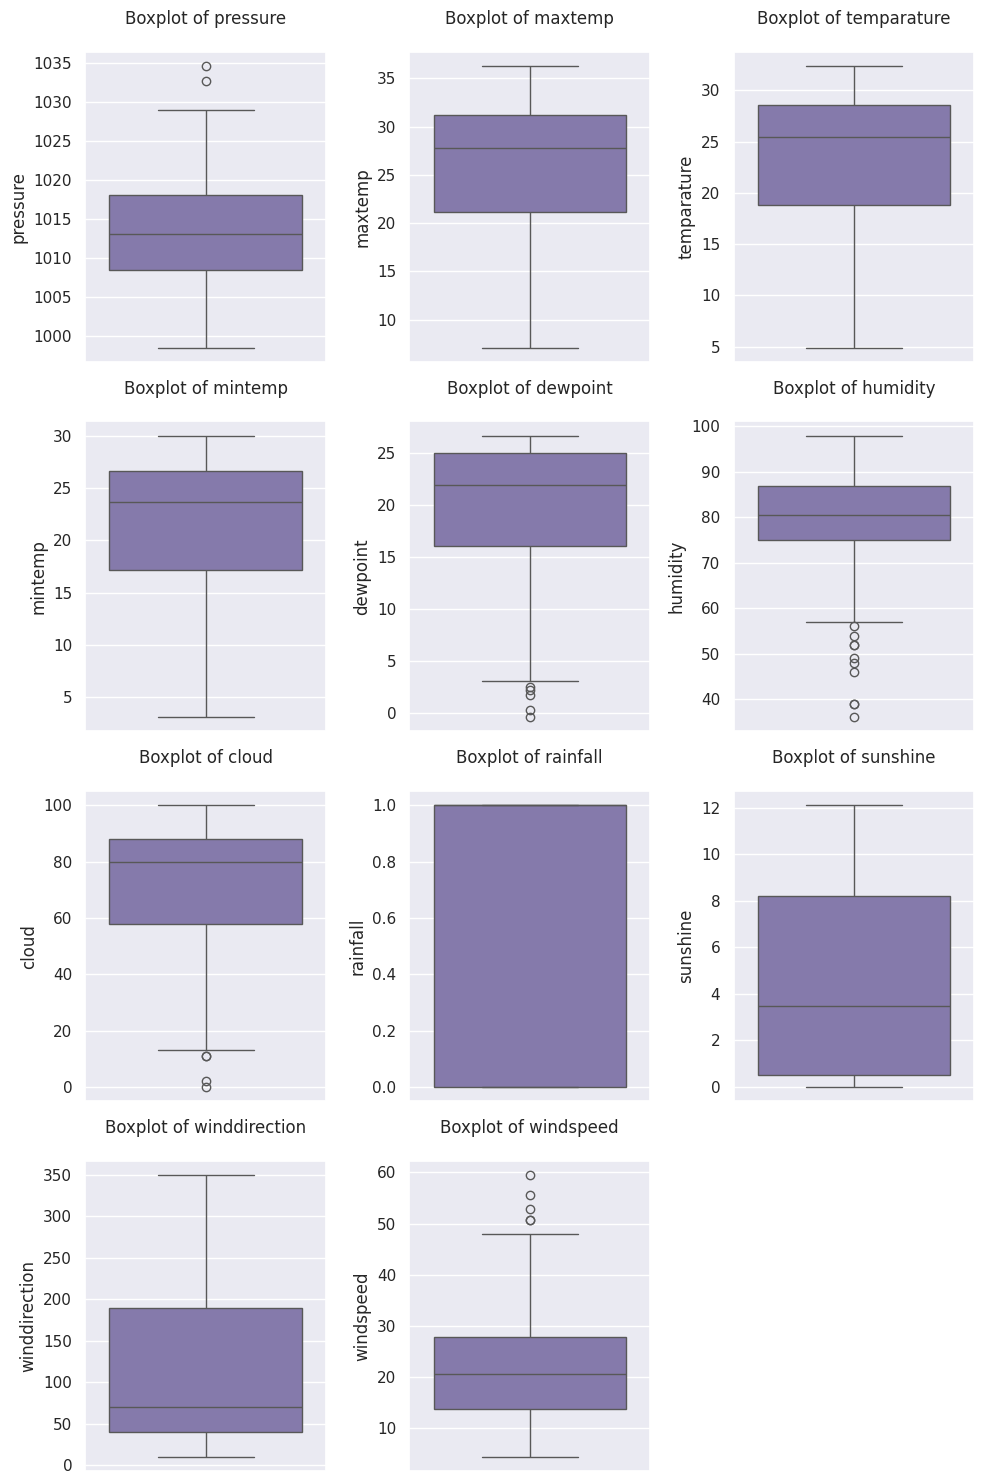

In [ ]:
plt.figure(figsize=(10,15))
for i , col in enumerate(df.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[col], color='m')
  plt.title(f"Boxplot of {col}",pad=20)
  plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [ ]:
# Dropping highly correlated columns to avoid multi-colinearity
df = df.drop(columns=['maxtemp' , 'mintemp' , 'dewpoint' ])

### SMOTE (Synthetic Minority Oversampling Technique) ( resmapling technique to avoid imbalanced data )

In [ ]:
# Understand the majority and minority class
print(df['rainfall'].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
# Separating majority and minority classes
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
from sklearn.utils import resample

df_minority_resampled = resample(df_minority, n_samples=len(df_majority), replace=True)  # over sampling

In [ ]:
print(df_majority.shape)
print(df_minority_resampled.shape)

(249, 8)
(249, 8)


In [ ]:
# concatinate both datasets
new_df = pd.concat([df_majority , df_minority_resampled])

In [ ]:
new_df['rainfall'].value_counts()

,count
rainfall,
1,249
0,249


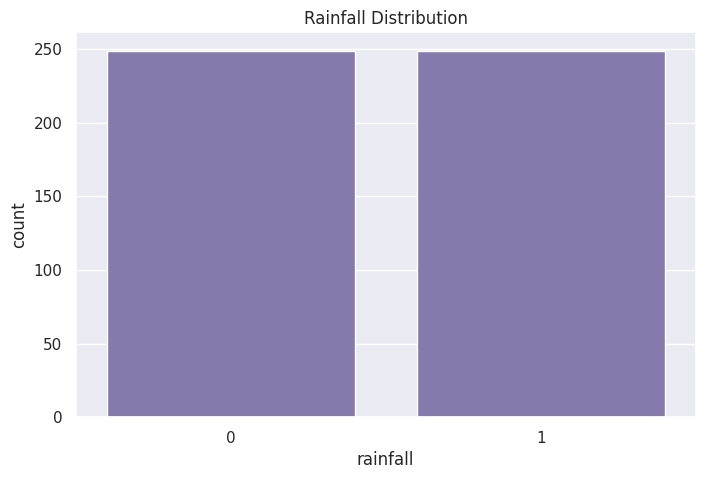

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = new_df['rainfall'], data=new_df, color='m')
plt.title('Rainfall Distribution')
plt.show()

In [ ]:
new_df.head()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,18.3,72,49,1,9.3,80.0,26.3
1,1022.0,18.9,81,83,1,0.6,50.0,15.3
2,1019.7,19.3,95,91,1,0.0,40.0,14.2
3,1018.9,20.6,90,88,1,1.0,50.0,16.9
4,1015.9,20.7,95,81,1,0.0,40.0,13.7


In [ ]:
new_df.tail()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
249,1008.1,29.6,79,43,0,9.7,240.0,24.9
34,1021.8,15.2,76,45,0,9.2,40.0,9.1
18,1020.1,16.4,78,84,0,1.0,60.0,38.0
46,1025.4,12.8,63,89,0,0.7,20.0,23.5
11,1019.9,17.3,79,86,0,0.6,20.0,23.9


In [ ]:
# shuffling the dataset to ensures that the data is randomized, which can help prevent the model from memorizing any patterns in the order of the data
new_df = new_df.sample(frac=1,random_state=1234).reset_index(drop=True)

In [ ]:
new_df.tail()

,pressure,temparature,humidity,cloud,rainfall,sunshine,winddirection,windspeed
493,1007.9,29.9,79,78,1,4.1,220.0,25.1
494,1011.2,24.8,73,69,1,7.2,10.0,21.9
495,1016.0,26.1,84,20,0,8.2,80.0,7.9
496,1020.2,15.3,98,99,1,0.0,70.0,42.0
497,1016.2,20.0,83,88,0,0.2,70.0,39.5


In [ ]:
# Feature & Label Split
X = new_df.drop('rainfall', axis=1)
y = new_df['rainfall']
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Training**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt','log2'],
    'max_depth': [10, 20, 30, None],
    'max_leaf_nodes': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

### **Hyperparameter Tuning**

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier , param_grid=param_grid,
                           cv = 5 , n_jobs=-1 , verbose=2)
grid_search.fit(X_train , y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# best model
best_rf = grid_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300, random_state=42)


In [ ]:
# best parameter combination for random forest
print("Best Parameters : ",grid_search.best_params_)

Best Parameters :  {'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


## **Model Evaluation**

In [ ]:
cv_score = cross_val_score(best_rf , X_train , y_train , cv=5)
print("cross Validation Score (Training): ",cv_score)
print("Mean Cross validation Score (Training): " , np.mean(cv_score))

cross Validation Score (Training):  [0.8        0.9        0.9125     0.84810127 0.81012658]
Mean Cross validation Score (Training):  0.8541455696202533


In [ ]:
y_pred = best_rf.predict(X_test)

print("Test set Accuracy: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("")
print("Classification Report : \n",classification_report(y_test, y_pred))

Test set Accuracy:  0.85
Confusion Matrix : 
 [[39  8]
 [ 7 46]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        47
           1       0.85      0.87      0.86        53

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



## Prediction On Unknown Data

In [ ]:
X_train.columns

Index(['pressure', 'temparature', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [ ]:
input_data = (1007.9	, 29.9	, 79, 	78, 4.1	, 220.0	, 25.1)
input_df = pd.DataFrame([input_data], columns=X_train.columns)
prediction = best_rf.predict(input_df)
print("Prediction Result : " , "Rainfall" if prediction[0] == 1 else "No Rainfall")


Prediction Result :  Rainfall


In [ ]:
# saving the model
model_data = {"model": best_rf , "feature_names":X.columns.tolist()}
with open('rainfall_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

In [ ]:
# load the saved model file
with open('rainfall_prediction_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

In [ ]:
input_data = (1016.0,	26.1,	84,	20	,	8.2	,80.0	,7.9)
input_df = pd.DataFrame([input_data])
prediction = model_data["model"].predict(input_df)
print("Prediction Result : " , "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result :  No Rainfall
